In [1]:
#import dependencies 
from path import Path
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#import data
file_path = Path("./Resources/cbp_clean.csv")
cbp_df = pd.read_csv(file_path, low_memory=False)
cbp_df.head()

,unique_id,date_in,date_out,hours_in_custody,age_group,gender,year_in,month_in,year_out,month_out,country_code,days_in_custody
0,0,2017-01-20,2017-01-20,9.95,4,2,2017,1,2017,1,1,0.41
1,1,2017-01-20,2017-01-24,113.23,3,2,2017,1,2017,1,2,4.72
2,2,2017-01-20,2017-01-24,113.42,3,2,2017,1,2017,1,4,4.73
3,3,2017-01-20,2017-01-21,30.08,6,1,2017,1,2017,1,1,1.25
4,4,2017-01-20,2017-01-21,36.53,3,1,2017,1,2017,1,5,1.52


In [3]:
cbp_df['hours_in_custody'].describe()

count    582208.000000
mean         64.851608
std          53.391101
min           0.010000
25%          31.130000
50%          53.170000
75%          85.930000
max         991.220000
Name: hours_in_custody, dtype: float64

In [6]:
#identify upper outliers
IQR = 85.93-31.13
(IQR*1.5) + 85.93

168.13000000000002

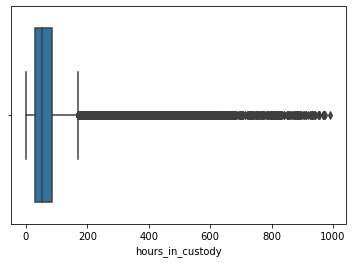

In [7]:
sns.boxplot(x=cbp_df['hours_in_custody'])

In [8]:
# Remove negative values and outliers
cbp_df.drop(cbp_df.loc[cbp_df['hours_in_custody']>168.13].index, inplace=True)
cbp_df.drop(cbp_df.loc[cbp_df['hours_in_custody']<=0].index, inplace=True)
cbp_df

,unique_id,date_in,date_out,hours_in_custody,age_group,gender,year_in,month_in,year_out,month_out,country_code,days_in_custody
0,0,2017-01-20,2017-01-20,9.95,4,2,2017,1,2017,1,1,0.41
1,1,2017-01-20,2017-01-24,113.23,3,2,2017,1,2017,1,2,4.72
2,2,2017-01-20,2017-01-24,113.42,3,2,2017,1,2017,1,4,4.73
3,3,2017-01-20,2017-01-21,30.08,6,1,2017,1,2017,1,1,1.25
4,4,2017-01-20,2017-01-21,36.53,3,1,2017,1,2017,1,5,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...
582203,583803,2020-06-18,2020-06-18,4.77,7,1,2020,6,2020,6,7,0.20
582204,583804,2020-06-18,2020-06-19,21.62,7,1,2020,6,2020,6,7,0.90
582205,583805,2020-06-19,2020-06-19,2.81,6,2,2020,6,2020,6,7,0.12
582206,583806,2020-06-19,2020-06-20,20.76,7,2,2020,6,2020,6,7,0.87


# Exploratory Analysis

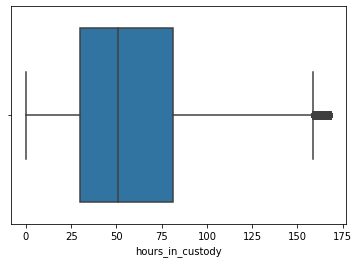

In [9]:
#View boxplot after uniforming 
sns.boxplot(x=cbp_df['hours_in_custody'])

In [10]:
#perform log transformation
cbp_df['log_trans'] = np.log(cbp_df['hours_in_custody'])
cbp_df

,unique_id,date_in,date_out,hours_in_custody,age_group,gender,year_in,month_in,year_out,month_out,country_code,days_in_custody,log_trans
0,0,2017-01-20,2017-01-20,9.95,4,2,2017,1,2017,1,1,0.41,2.297573
1,1,2017-01-20,2017-01-24,113.23,3,2,2017,1,2017,1,2,4.72,4.729421
2,2,2017-01-20,2017-01-24,113.42,3,2,2017,1,2017,1,4,4.73,4.731098
3,3,2017-01-20,2017-01-21,30.08,6,1,2017,1,2017,1,1,1.25,3.403860
4,4,2017-01-20,2017-01-21,36.53,3,1,2017,1,2017,1,5,1.52,3.598134
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582203,583803,2020-06-18,2020-06-18,4.77,7,1,2020,6,2020,6,7,0.20,1.562346
582204,583804,2020-06-18,2020-06-19,21.62,7,1,2020,6,2020,6,7,0.90,3.073619
582205,583805,2020-06-19,2020-06-19,2.81,6,2,2020,6,2020,6,7,0.12,1.033184
582206,583806,2020-06-19,2020-06-20,20.76,7,2,2020,6,2020,6,7,0.87,3.033028


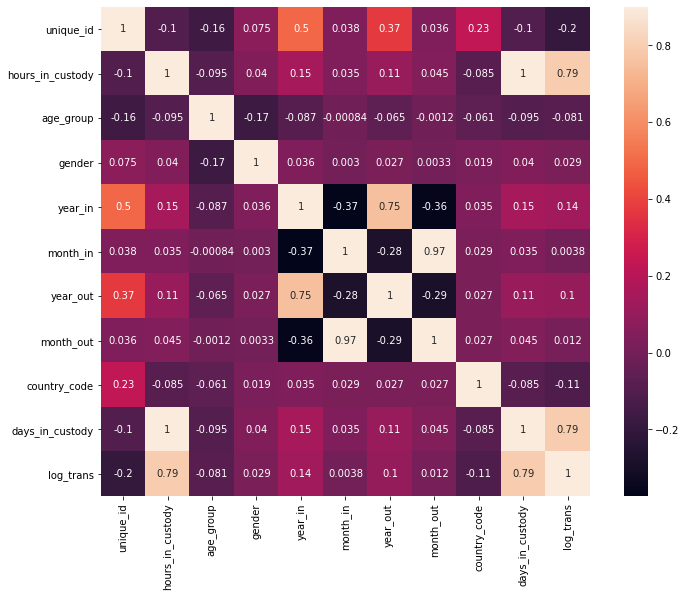

In [11]:
#correlation map 
corr_matrix = cbp_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, annot=True, square=True)
#time in custody doesn't appear to be influenced by any of these factors, which is interesting considering
#the bias that exists in the data

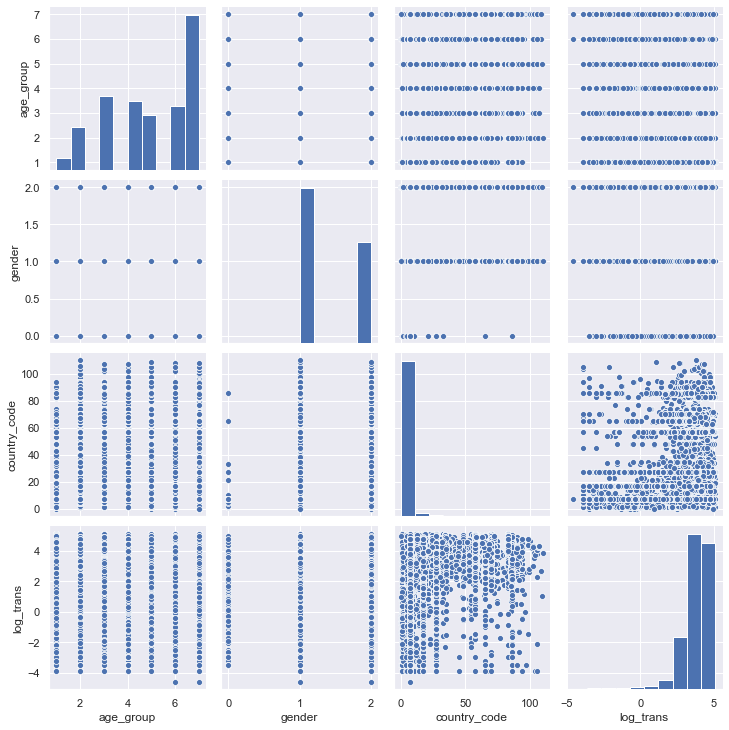

In [12]:
sns.set()
cols = ['age_group', 'gender', 'country_code', 'log_trans']
sns.pairplot(cbp_df[cols], height = 2.5)
plt.show()

# Multiple Linear Regression

In [13]:
#Multiple Linear Regression 
# declare x, y 
y = cbp_df['log_trans']
X = cbp_df[['age_group', 'gender', 'country_code']]

In [14]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [15]:
#Check intercept and coefficient
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 4.031989941079535
Coefficients: 
 [-0.04619419  0.03306751 -0.01772042]


In [17]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_trans   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3985.
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:57:00   Log-Likelihood:            -7.8887e+05
No. Observations:              560735   AIC:                         1.578e+06
Df Residuals:                  560731   BIC:                         1.578e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.0320      0.006    682.533   

# Logisitic Regression

In [18]:
# Decide on binary options to classify data based on other features. In this case, we will use
# the average amount of time in custody to predict who would stay in equal to or below average custody 
# or who'd be above average time spent in custody 
#First, identify average time spent in custody using the log transformation column pulled from hours in custody
cbp_df['log_trans'].describe()

count    560735.000000
mean          3.766897
std           0.998464
min          -4.605170
25%           3.402197
50%           3.925531
75%           4.399621
max           5.124737
Name: log_trans, dtype: float64

In [28]:
#Create column to indicate those who spent above average time in detention and those who did not

cbp_df['long_detention'] = np.where(cbp_df['log_trans']>3.76689, 1,0)
cbp_df

,unique_id,date_in,date_out,hours_in_custody,age_group,gender,year_in,month_in,year_out,month_out,country_code,days_in_custody,log_trans,long_detention
0,0,2017-01-20,2017-01-20,9.95,4,2,2017,1,2017,1,1,0.41,2.297573,0
1,1,2017-01-20,2017-01-24,113.23,3,2,2017,1,2017,1,2,4.72,4.729421,1
2,2,2017-01-20,2017-01-24,113.42,3,2,2017,1,2017,1,4,4.73,4.731098,1
3,3,2017-01-20,2017-01-21,30.08,6,1,2017,1,2017,1,1,1.25,3.403860,0
4,4,2017-01-20,2017-01-21,36.53,3,1,2017,1,2017,1,5,1.52,3.598134,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582203,583803,2020-06-18,2020-06-18,4.77,7,1,2020,6,2020,6,7,0.20,1.562346,0
582204,583804,2020-06-18,2020-06-19,21.62,7,1,2020,6,2020,6,7,0.90,3.073619,0
582205,583805,2020-06-19,2020-06-19,2.81,6,2,2020,6,2020,6,7,0.12,1.033184,0
582206,583806,2020-06-19,2020-06-20,20.76,7,2,2020,6,2020,6,7,0.87,3.033028,0


In [29]:
# create dataframe for logistic regression that only uses features I want to analyze
cbp_for_logreg = cbp_df[['age_group', 'gender', 'year_in', 'year_out', 'long_detention', 'country_code']]
cbp_for_logreg

,age_group,gender,year_in,year_out,long_detention,country_code
0,4,2,2017,2017,0,1
1,3,2,2017,2017,1,2
2,3,2,2017,2017,1,4
3,6,1,2017,2017,0,1
4,3,1,2017,2017,0,5
...,...,...,...,...,...,...
582203,7,1,2020,2020,0,7
582204,7,1,2020,2020,0,7
582205,6,2,2020,2020,0,7
582206,7,2,2020,2020,0,7


In [30]:
# separate features from target
y = cbp_for_logreg['long_detention']
X = cbp_for_logreg.drop(columns='long_detention')

In [31]:
#split data into training and testing 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y)
X_train.shape

(420551, 5)

In [32]:
# create logistic regression model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=300000)

In [33]:
# fit/train model 
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=300000)

In [34]:
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0
5,1,1
6,1,0
7,1,1
8,1,0
9,1,1


In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# log transformation improved this

0.627510985561833
